In [1]:
# Data Preparation Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import random

# Data Profiling
import pandas_profiling

# Plot and Visualisations
# Plot and Visualisations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
%matplotlib inline

# Notebook settings
import warnings
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

# ML Libraries
warnings.filterwarnings('ignore')
import sklearn
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import xgboost as xgb
import lightgbm as lgb #Importing Light GBM Library
from xgboost.sklearn import XGBClassifier

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.model_selection import cross_val_score

In [2]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

### Import datasets

In [3]:
train = pd.read_csv('https://drive.google.com/uc?id=1ELoXPBkCfGoR-38qI27dTdl56GcX3A0Z').drop(columns=['Unnamed: 0'])
train.head()

,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_0,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone brick,HOUSETYPE_MODE_0,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,FONDKAPREMONT_MODE_0,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry type 1,ORGANIZATION_TYPE_Industry type 10,ORGANIZATION_TYPE_Industry type 11,ORGANIZATION_TYPE_Industry type 12,ORGANIZATION_TYPE_Industry type 13,ORGANIZATION_TYPE_Industry type 2,ORGANIZATION_TYPE_Industry type 3,ORGANIZATION_TYPE_Industry type 4,ORGANIZATION_TYPE_Industry type 5,ORGANIZATION_TYPE_Industry type 6,ORGANIZATION_TYPE_Industry type 7,ORGANIZATION_TYPE_Industry type 8,ORGANIZATION_TYPE_Industry type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade type 1,ORGANIZATION_TYPE_Trade type 2,ORGANIZATION_TYPE_Trade type 3,ORGANIZATION_TYPE_Trade type 4,ORGANIZATION_TYPE_Trade type 5,ORGANIZATION_TYPE_Trade type 6,ORGANIZATION_TYPE_Trade type 7,ORGANIZATION_TYPE_Transport type 1,ORGANIZATION_TYPE_Transport type 2,ORGANIZATION_TYPE_Transport type 3,ORGANIZATION_TYPE_Transport type 4,ORGANIZATION_TYPE_University,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,OCCUPATION_TYPE_0,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse partner,FLAG_OWN_REALTY_N,FLAG_OWN_CAR_N,CODE_GENDER_F,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DA

In [4]:
train.shape

(60161, 293)

In [5]:
test = pd.read_csv('https://drive.google.com/uc?id=1lDsRYRAC4EVRIQgZHbaY5MnTqJ7pkYYh').drop(columns=['Unnamed: 0'])
test.head()

,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_0,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone brick,HOUSETYPE_MODE_0,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,FONDKAPREMONT_MODE_0,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry type 1,ORGANIZATION_TYPE_Industry type 10,ORGANIZATION_TYPE_Industry type 11,ORGANIZATION_TYPE_Industry type 12,ORGANIZATION_TYPE_Industry type 13,ORGANIZATION_TYPE_Industry type 2,ORGANIZATION_TYPE_Industry type 3,ORGANIZATION_TYPE_Industry type 4,ORGANIZATION_TYPE_Industry type 5,ORGANIZATION_TYPE_Industry type 6,ORGANIZATION_TYPE_Industry type 7,ORGANIZATION_TYPE_Industry type 8,ORGANIZATION_TYPE_Industry type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade type 1,ORGANIZATION_TYPE_Trade type 2,ORGANIZATION_TYPE_Trade type 3,ORGANIZATION_TYPE_Trade type 4,ORGANIZATION_TYPE_Trade type 5,ORGANIZATION_TYPE_Trade type 6,ORGANIZATION_TYPE_Trade type 7,ORGANIZATION_TYPE_Transport type 1,ORGANIZATION_TYPE_Transport type 2,ORGANIZATION_TYPE_Transport type 3,ORGANIZATION_TYPE_Transport type 4,ORGANIZATION_TYPE_University,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,OCCUPATION_TYPE_0,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse partner,FLAG_OWN_REALTY_N,FLAG_OWN_CAR_N,CODE_GENDER_F,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DA

In [6]:
test.shape

(16091, 293)

### Split to Train Test

In [71]:
target = ['TARGET']

In [72]:
y_train = train[target]
y_test = test[target]
X_train = train.drop(target, axis=1)
X_test = test.drop(target, axis=1)
print(X_train.shape)
print(X_test.shape)

(60161, 292)
(16091, 292)


### Baseline Model

In [133]:
def baseline_classification_model(classifier, X_train, y_train, X_test, y_test, proba=0.5):
    classifier.fit(X_train, y_train)
    y_proba = classifier.predict_proba(X_test)
    y_pred_test = np.where(y_proba[:, 1] > proba, 1, 0)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
    print("Model Report",)
    print()
    accuracy = metrics.accuracy_score(y_test, y_pred_test)
    print('Number of features used:', X_train.shape[1])
    print("Accuracy Score Test:", accuracy)
    print("ROC AUC Test: ",roc_auc)
    from xgboost import plot_importance
    print()
    print('Feature Importance - top 20 features used:')
    plot_importance(classifier,importance_type='weight',max_num_features=20)

In [137]:
classifier = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, nthread=16, random_state=0)

Model Report

Number of features used: 220
Accuracy Score Test: 0.763097383630601
ROC AUC Test:  0.6996925747838053

Feature Importance - top 20 features used:


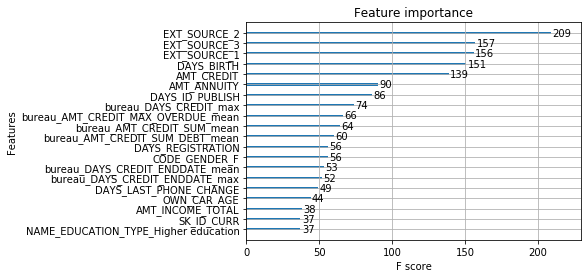

In [135]:
baseline_classification_model(classifier, X_train, y_train, X_test, y_test)

# Feature selection

## Filter Methods

### 1. Eliminating constant features

In [76]:
print('X train shape before constant features removal: ', X_train.shape)
print('X test shape before constant features removal: ', X_test.shape)

constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

print('X train shape after constant features removal: ', X_train.shape)
print('X test shape after constant features removal: ', X_test.shape)

X train shape before constant features removal:  (60161, 292)
X test shape before constant features removal:  (16091, 292)
X train shape after constant features removal:  (60161, 288)
X test shape after constant features removal:  (16091, 288)


In [77]:
constant_features

['FLAG_MOBIL',
 'bureau_CREDIT_TYPE_Interbank credit_count',
 'bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count',
 'bureau_CREDIT_TYPE_Mobile operator loan_count']

### 2. Eliminating quasi-constant features

In [78]:
quasi_constant_feat = []
for feature in X_train.columns:

    # find the predominant value
    predominant = (X_train[feature].value_counts() / np.float(
        len(X_train))).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    if predominant > 0.997:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

61

In [79]:
quasi_constant_feat

['ORGANIZATION_TYPE_Advertising',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Industry type 10',
 'ORGANIZATION_TYPE_Industry type 12',
 'ORGANIZATION_TYPE_Industry type 13',
 'ORGANIZATION_TYPE_Industry type 2',
 'ORGANIZATION_TYPE_Industry type 5',
 'ORGANIZATION_TYPE_Industry type 6',
 'ORGANIZATION_TYPE_Industry type 8',
 'ORGANIZATION_TYPE_Insurance',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Realtor',
 'ORGANIZATION_TYPE_Religion',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Trade type 1',
 'ORGANIZATION_TYPE_Trade type 4',
 'ORGANIZATION_TYPE_Trade type 5',
 'ORGANIZATION_TYPE_Trade type 6',
 'ORGANIZATION_TYPE_Transport type 1',
 'OCCUPATION_TYPE_HR staff',
 'OCCUPATION_TYPE_IT staff',
 'OCCUPATION_TYPE_Realty agents',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Maternity leave',
 'N

In [80]:
print('X train shape before quasi constant features removal: ', X_train.shape)
print('X test shape before quasi constant features removal: ', X_test.shape)

X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)

print('X train shape before quasi constant features removal: ', X_train.shape)
print('X test shape before quasi constant features removal: ', X_test.shape)

X train shape before quasi constant features removal:  (60161, 288)
X test shape before quasi constant features removal:  (16091, 288)
X train shape before quasi constant features removal:  (60161, 227)
X test shape before quasi constant features removal:  (16091, 227)


### Eliminating corelated features (automated approach)

In [81]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [82]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

7

In [83]:
print('X train shape before correlated features removal: ', X_train.shape)
print('X test shape before correlated features removal: ', X_test.shape)

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

print('X train shape after correlated features removal: ', X_train.shape)
print('X test shape after correlated features removal: ', X_test.shape)

X train shape before correlated features removal:  (60161, 227)
X test shape before correlated features removal:  (16091, 227)
X train shape after correlated features removal:  (60161, 220)
X test shape after correlated features removal:  (16091, 220)


In [84]:
corr_features

{'CODE_GENDER_M',
 'DAYS_EMPLOYED',
 'EMERGENCYSTATE_MODE_No',
 'FLAG_EMP_PHONE',
 'HOUSETYPE_MODE_0',
 'HOUSETYPE_MODE_block of flats',
 'YEARS_BEGINEXPLUATATION_AVG'}

### Eliminating duplicated features

In [139]:
# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated

X_train.duplicated().sum()

0

In [141]:
# we can capture the duplicated features, by capturing the
# index values of the transposed dataframe like this:
duplicated_features = X_train[X_train.duplicated()].index.values
duplicated_features

array([], dtype=int64)

In [146]:
print('X train shape before correlated features removal: ', X_train.shape)
print('X test shape before correlated features removal: ', X_test.shape)

X_train = X_train.drop_duplicates(keep='first')
X_test = X_test.drop_duplicates(keep='first')

print('X train shape after correlated features removal: ', X_train.shape)
print('X test shape after correlated features removal: ', X_test.shape)

X train shape before correlated features removal:  (60161, 220)
X test shape before correlated features removal:  (16091, 220)
X train shape after correlated features removal:  (60161, 220)
X test shape after correlated features removal:  (16091, 220)


### Baseline model after Filter Methods

Model Report

Number of features used: 220
Accuracy Score Test: 0.763097383630601
ROC AUC Test:  0.6996925747838053

Feature Importance - top 20 features used:


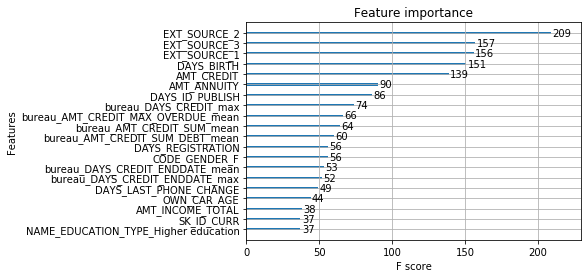

In [90]:
baseline_classification_model(classifier, X_train, y_train, X_test, y_test)

### Filter methods Bonus: using IV and WOE to determine top Features

[IV and WOE explained!](https://towardsdatascience.com/model-or-do-you-mean-weight-of-evidence-woe-and-information-value-iv-331499f6fc2)

In [147]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [150]:
final_iv, IV = data_vars(train, train['TARGET'])

In [151]:
IV.round(decimals=8).sort_values('IV')

,VAR_NAME,IV
291,client_bureau_balance_STATUS_X_count_norm_min,0.000000
30,FLAG_MOBIL,0.000000
61,NAME_INCOME_TYPE_Businessman,0.000000
225,bureau_CREDIT_TYPE_Loan for the purchase of eq...,0.000000
224,bureau_CREDIT_TYPE_Loan for the purchase of eq...,0.000000
...,...,...
15,DAYS_BIRTH,0.080727
241,bureau_DAYS_CREDIT_UPDATE_mean,0.085617
244,bureau_DAYS_CREDIT_mean,0.108089
26,EXT_SOURCE_3,0.222223


In [152]:
# definitie functie agregare status modele
def agregare_status(row):
    if row['IV'] < 0.02:
        val = 'Useless Predictor'
    elif row['IV'] < 0.1:
        val = 'Weak Predictor'
    elif row['IV'] < 0.3:
        val = 'Medium Predictor'
    elif row['IV'] < 0.5:
        val = 'Strong Predictor'
    else:
        val = 'To good to be True'
    return val
IV['IV_Interpretation'] = IV.apply(agregare_status, axis=1)
IV.head(20).round(decimals=8).sort_values('IV')

,VAR_NAME,IV,IV_Interpretation
9,APARTMENTS_AVG,0.000000,Useless Predictor
14,COMMONAREA_AVG,0.000000,Useless Predictor
10,BASEMENTAREA_AVG,0.000000,Useless Predictor
4,AMT_REQ_CREDIT_BUREAU_HOUR,0.000009,Useless Predictor
3,AMT_REQ_CREDIT_BUREAU_DAY,0.000010,Useless Predictor
6,AMT_REQ_CREDIT_BUREAU_QRT,0.000114,Useless Predictor
7,AMT_REQ_CREDIT_BUREAU_WEEK,0.000127,Useless Predictor
0,AMT_ANNUITY,0.000255,Useless Predictor
8,AMT_REQ_CREDIT_BUREAU_YEAR,0.000318,Useless Predictor
11,CNT_CHILDREN,0.000783,Useless Predictor


In [153]:
final_iv.round(decimals=8)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,EMERGENCYSTATE_MODE_0,0.0,0.0,30376,11327,0.372893,19049,0.627107,0.456274,0.539082,-0.166774,0.027492
1,EMERGENCYSTATE_MODE_0,1.0,1.0,29785,13498,0.453181,16287,0.546819,0.543726,0.460918,0.165225,0.027492
2,EMERGENCYSTATE_MODE_No,0.0,0.0,30262,13721,0.453407,16541,0.546593,0.552709,0.468106,0.166136,0.028712
3,EMERGENCYSTATE_MODE_No,1.0,1.0,29899,11104,0.371384,18795,0.628616,0.447291,0.531894,-0.173234,0.028712
4,WALLSMATERIAL_MODE_0,0.0,0.0,28365,10554,0.372078,17811,0.627922,0.425136,0.504047,-0.170260,0.025087
...,...,...,...,...,...,...,...,...,...,...,...,...
623,client_bureau_balance_STATUS_X_count_min,0.0,1.0,58314,24175,0.414566,34139,0.585434,0.973817,0.966125,0.007930,0.002042
624,client_bureau_balance_STATUS_X_count_min,2.0,95.0,1847,650,0.351922,1197,0.648078,0.026183,0.033875,-0.257550,0.002042
625,client_bureau_balance_STATUS_X_count_norm_mean,0.0,1.0,60161,24825,0.412643,35336,0.587357,1.000000,1.000000,0.000000,0.000000
626,client_bureau_balance_STATUS_X_count_norm_max,0.0,1.0,60161,24825,0.412643,35336,0.587357,1.000000,1.000000,0.000000,0.000000


## Model Embedded Methods

### Logistic Regression and P values

In [157]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_train)
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
pvalues = model.pvalues

In [158]:
result = pd.DataFrame(pvalues.round(decimals=4), columns=['P_value'])
result.sort_values('P_value', ascending=True)

,P_value
const,0.0000
DAYS_LAST_PHONE_CHANGE,0.0000
DEF_30_CNT_SOCIAL_CIRCLE,0.0000
EXT_SOURCE_3,0.0000
NAME_EDUCATION_TYPE_Higher education,0.0000
...,...
bureau_CREDIT_TYPE_Consumer credit_count_norm,0.9527
OCCUPATION_TYPE_Drivers,0.9852
ORGANIZATION_TYPE_Business Entity Type 1,0.9920
BASEMENTAREA_AVG,0.9927


In [161]:
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Statistically significant Alerts are (p value < 0.05):")
print(selected_features_BE)

Statistically significant Alerts are (p value < 0.05):
['WALLSMATERIAL_MODE_Stone brick', 'FONDKAPREMONT_MODE_not specified', 'FONDKAPREMONT_MODE_reg oper account', 'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Business Entity Type 3', 'ORGANIZATION_TYPE_Construction', 'ORGANIZATION_TYPE_Industry type 3', 'ORGANIZATION_TYPE_Industry type 9', 'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Police', 'ORGANIZATION_TYPE_Restaurant', 'ORGANIZATION_TYPE_Self-employed', 'ORGANIZATION_TYPE_Trade type 2', 'ORGANIZATION_TYPE_Trade type 3', 'ORGANIZATION_TYPE_Trade type 7', 'ORGANIZATION_TYPE_Transport type 3', 'WEEKDAY_APPR_PROCESS_START_MONDAY', 'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'WEEKDAY_APPR_PROCESS_START_SUNDAY', 'OCCUPATION_TYPE_0', 'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_High skill tech staff', 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Medicine staff', 'OCCUPATION_TYPE_Private service 

### Extra Trees

In [175]:
classifier = ExtraTreesClassifier(n_estimators=50)
classifier

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [176]:
classifier.fit(X_train, y_train)
 
warnings.filterwarnings('ignore')
#Make predictions on training set:
y_pred = classifier.predict(X_train)
y_proba = classifier.predict_proba(X_train)

In [177]:
featimp = pd.Series(classifier.feature_importances_, index=features).sort_values(ascending=False)
print("Feature importance:")
print(featimp[0:50])

Feature importance:
NONLIVINGAREA_AVG                                0.040467
bureau_CNT_CREDIT_PROLONG_mean                   0.027460
OBS_30_CNT_SOCIAL_CIRCLE                         0.017215
client_bureau_balance_STATUS_5_count_mean        0.016498
bureau_DAYS_ENDDATE_FACT_max                     0.014443
client_bureau_balance_MONTHS_BALANCE_max_mean    0.013842
BASEMENTAREA_AVG                                 0.013127
SK_ID_CURR                                       0.013068
bureau_AMT_ANNUITY_mean                          0.012690
NAME_HOUSING_TYPE_Municipal apartment            0.012575
bureau_CREDIT_ACTIVE_Sold_count_norm             0.012306
bureau_CREDIT_TYPE_Consumer credit_count_norm    0.012242
client_bureau_balance_STATUS_1_count_max         0.012082
client_bureau_balance_STATUS_C_count_min         0.011757
AMT_INCOME_TOTAL                                 0.011370
bureau_DAYS_ENDDATE_FACT_mean                    0.010975
AMT_REQ_CREDIT_BUREAU_DAY                        0.0

Text(0, 0.5, 'Feature Importance Score')

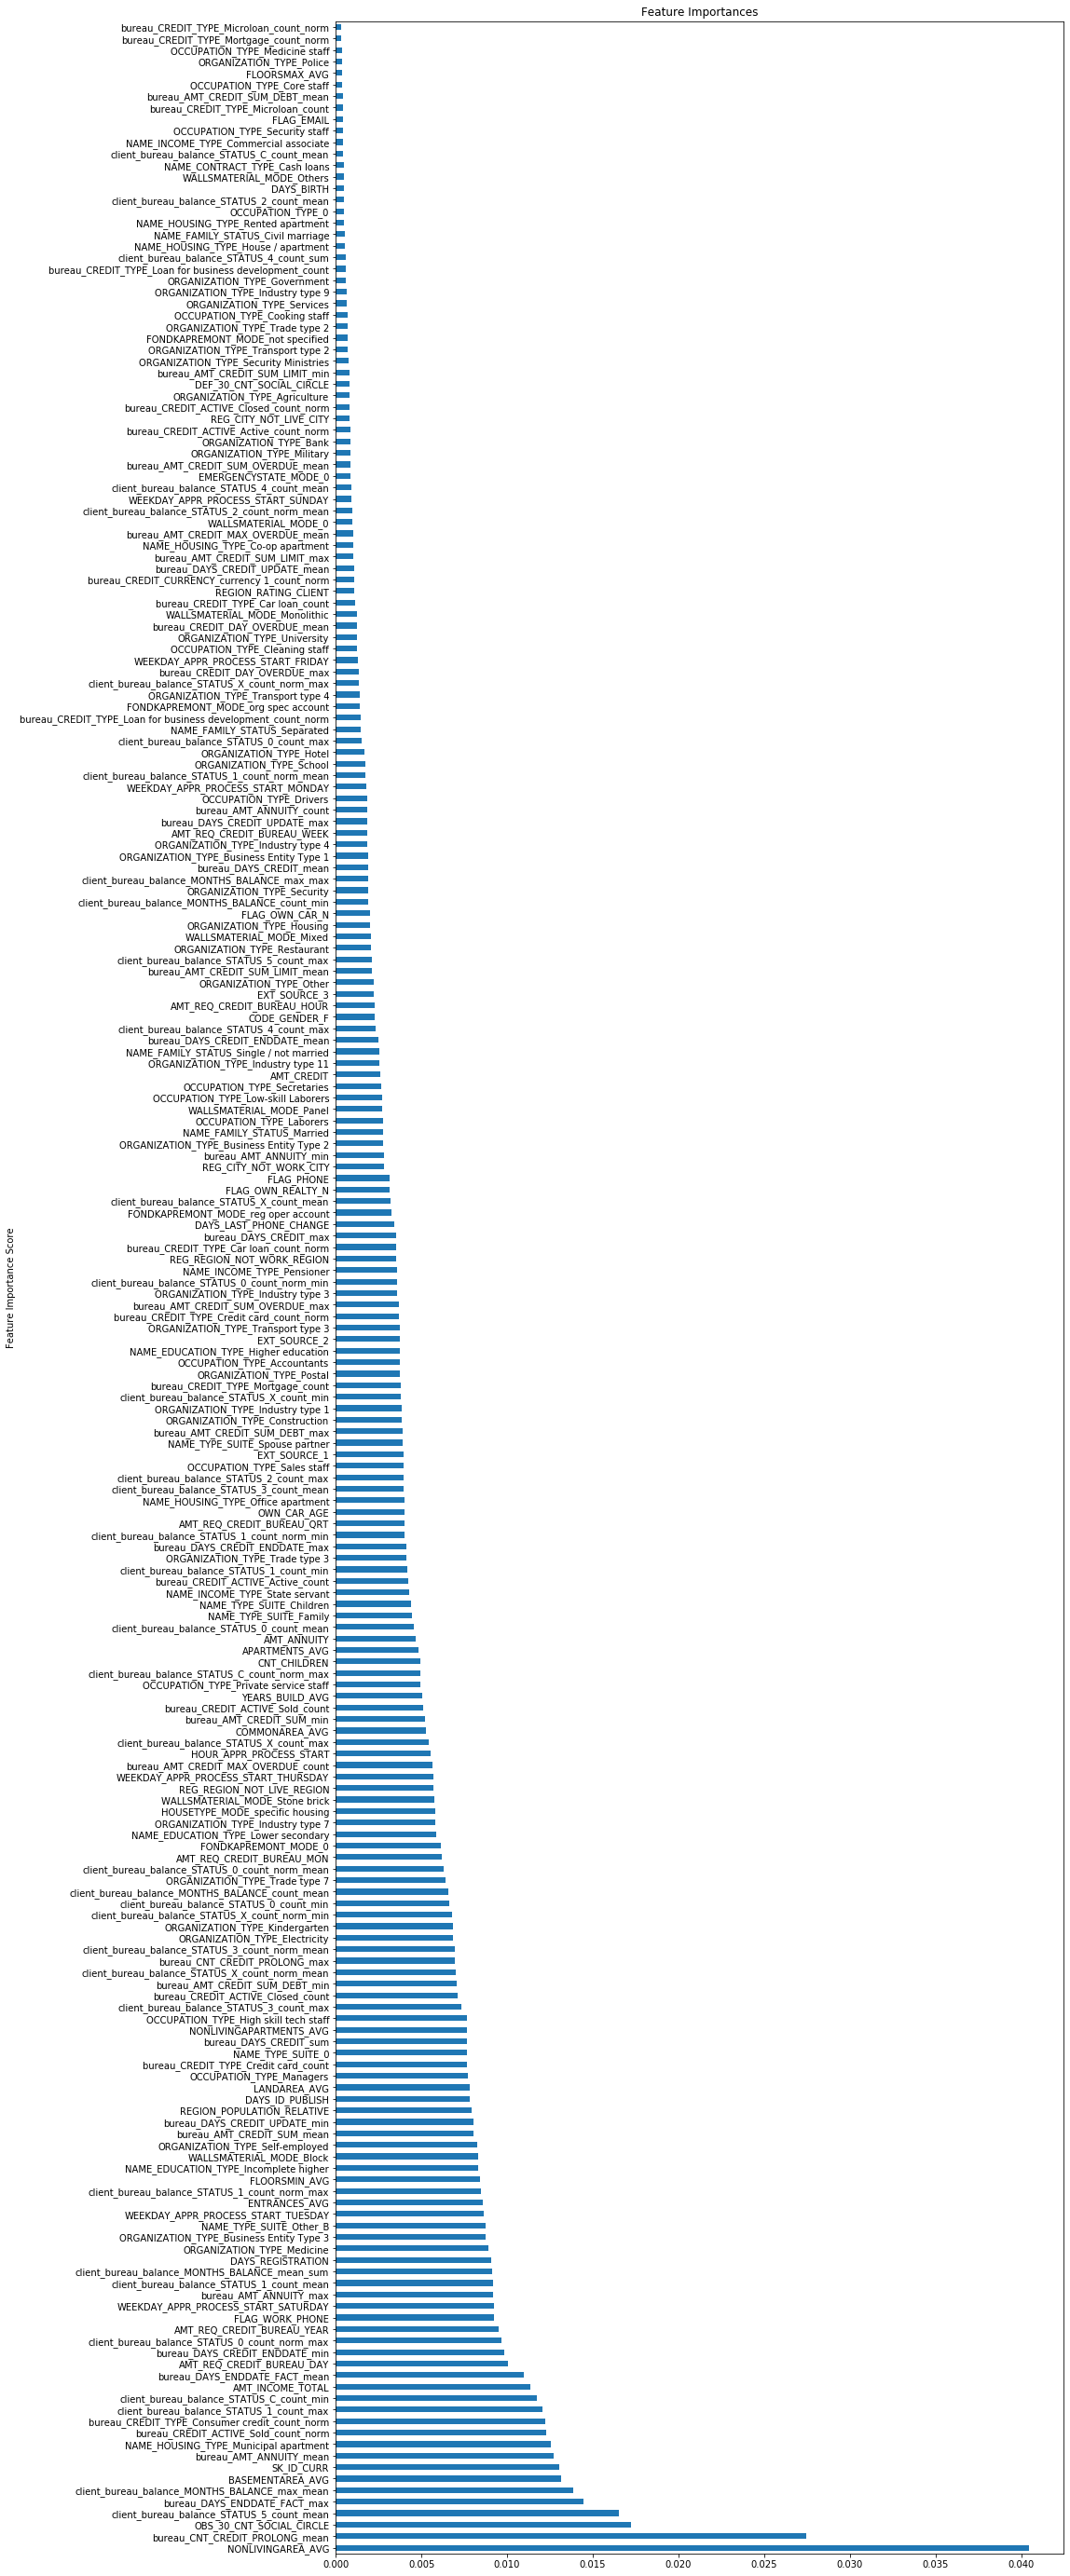

In [178]:
featimp.plot(kind='barh', title='Feature Importances', figsize=(14,50))
plt.ylabel('Feature Importance Score')

## Wraper methods

### RFE

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

[link to Scikit-Learn!](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [105]:
# RFE will remove one feature at each iteration, the least  important.
# then it will build another random forest and repeat till a criteria is met.

sel_ = RFE(RandomForestClassifier(n_estimators=10, max_depth=6, n_jobs = 16, random_state=0), 
           n_features_to_select=150, verbose=1)
sel_.fit(X_train, y_train)

Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
F

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=6,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=16,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=150, step=1, verbose=1)

In [106]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

150

In [107]:
# let's display the list of features
selected_feat

Index(['ORGANIZATION_TYPE_Transport type 2',
       'ORGANIZATION_TYPE_Transport type 3',
       'ORGANIZATION_TYPE_Transport type 4', 'ORGANIZATION_TYPE_University',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY', 'OCCUPATION_TYPE_0',
       ...
       'client_bureau_balance_STATUS_1_count_norm_min',
       'client_bureau_balance_STATUS_2_count_mean',
       'client_bureau_balance_STATUS_3_count_max',
       'client_bureau_balance_STATUS_3_count_norm_mean',
       'client_bureau_balance_STATUS_4_count_mean',
       'client_bureau_balance_STATUS_4_count_max',
       'client_bureau_balance_STATUS_4_count_sum',
       'client_bureau_balance_STATUS_5_count_max',
       'client_bureau_balance_STATUS_C_count_mean',
       'client_bureau_balance_STATUS_C_count_norm_max'],
      dtype='object', length=150)

In [108]:
X_train_top = X_train[selected_feat]
print(X_train_top.shape)
X_test_top = X_test[selected_feat]
print(X_test_top.shape)

(60161, 150)
(16091, 150)


Model Report

Number of features used: 150
Accuracy Score Test: 0.7627866509228761
ROC AUC Test:  0.6982434928804541

Feature Importance - top 20 features used:


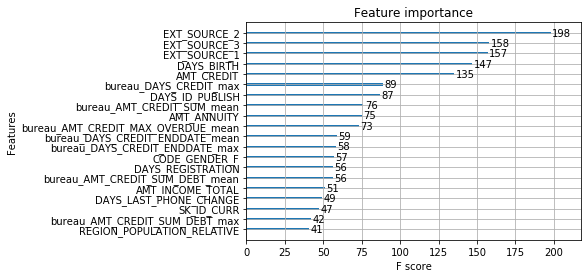

In [114]:
baseline_classification_model(classifier, X_train_top, y_train, X_test_top, y_test)